<a href="https://colab.research.google.com/github/Rachana901070/ai/blob/main/ai_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSP

In [ ]:
def is_valid(map, region, color, color_assignment):
    for neighbor in map[region]:
        if neighbor in color_assignment and color_assignment[neighbor] == color:
            return False
    return True


def solve_map_coloring(map, regions, colors, color_assignment={}):
    if len(color_assignment) == len(regions):
        return color_assignment

    current_region = [r for r in regions if r not in color_assignment][0]

    for color in colors:
        if is_valid(map, current_region, color, color_assignment):
            color_assignment[current_region] = color
            result = solve_map_coloring(map, regions, colors, color_assignment)
            if result is not None:
                return result
            del color_assignment[current_region]

    return None


if __name__ == "__main__":
    map = {
        "WA": ["NT", "SA"],
        "NT": ["WA", "SA", "Q"],
        "SA": ["WA", "NT", "Q", "NSW", "V"],
        "Q": ["NT", "SA", "NSW"],
        "NSW": ["Q", "SA", "V"],
        "V": ["SA", "NSW"],
    }
    regions = list(map.keys())
    colors = ["Red", "Green", "Blue"]

    coloring = solve_map_coloring(map, regions, colors)

    if coloring:
        print("Valid coloring:")
        for region, color in coloring.items():
            print(f"{region}: {color}")
    else:
        print("No valid coloring found.")

Valid coloring:
WA: Red
NT: Green
SA: Blue
Q: Red
NSW: Green
V: Red


#Min-Max

In [ ]:
import math
def findOptimal(currentLevel,index,isMaximizing,values,maxDepth):
  if currentLevel == maxDepth:
    return values[index]
  if isMaximizing:
    return max(findOptimal(currentLevel+1,index*2,False,values,maxDepth),
               findOptimal(currentLevel+1,index*2+1,False,values,maxDepth))
  else:
    return min(findOptimal(currentLevel+1,index*2,True,values,maxDepth),
               findOptimal(currentLevel+1,index*2+1,True,values,maxDepth))
values=[3,5,19,9,34,5,6,23]
maxDepth=math.log(len(values),2)
print("The optimal value is :",end="")
print(findOptimal(0,0,True,values,maxDepth))

The optimal value is :23


#Alpha-Beta

In [ ]:
MAX,MIN=1000,-1000
def minmax(level,idx,isMaximizing,scores,alpha,beta):
  if level==3:
    return scores[idx]
  if isMaximizing:
    bestvalue=MIN
    for j in range(2):
      result=minmax(level+1,idx*2+j,False,scores,alpha,beta)
      bestvalue=max(bestvalue,result)
      alpha=max(alpha,bestvalue)
      if beta<=alpha:
        break
    return bestvalue
  else:
    bestvalue=MAX
    for j in range(2):
      result=minmax(level+1,idx*2+j,True,scores,alpha,beta)
      bestvalue=min(bestvalue,result)
      beta=min(beta,bestvalue)
      if beta<=alpha:
        break
    return bestvalue
scores=[3,5,2,9,12,5,23,23]
print("The optimal value is:",minmax(0,0,True,scores,MIN,MAX))

The optimal value is: 12


#Bayesian

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 52.2 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import DiscreteBayesianNetwork


from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


model = DiscreteBayesianNetwork([
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'JohnCall'),
    ('Alarm', 'MaryCall')
])


cpd_burglary = TabularCPD(variable='Burglary', variable_card=2, values=[[0.99], [0.01]])


cpd_earthquake = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.98], [0.02]])


cpd_alarm = TabularCPD(variable='Alarm', variable_card=2,values=[[0.999, 0.71, 0.06, 0.05],[0.001, 0.29, 0.94, 0.95]],evidence=['Burglary', 'Earthquake'],evidence_card=[2, 2])

cpd_johncall = TabularCPD(variable='JohnCall', variable_card=2,values=[[0.95, 0.10],[0.05, 0.90]],evidence=['Alarm'],evidence_card=[2])


cpd_marycall = TabularCPD(variable='MaryCall', variable_card=2,values=[[0.99, 0.30],[0.01, 0.70]],evidence=['Alarm'],evidence_card=[2])

model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncall, cpd_marycall)

assert model.check_model()


inference = VariableElimination(model)
prob_alarm = inference.query(variables=['Alarm'], evidence={'Burglary': 1, 'Earthquake': 0})
print(prob_alarm)


+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.0600 |
+----------+--------------+
| Alarm(1) |       0.9400 |
+----------+--------------+


In [ ]:
print(model.check_model())

# Inference
alarm_inter = VariableElimination(model)
prob_burglary = alarm_inter.query(variables=['Burglary'], evidence={'JohnCall': 1, 'MaryCall': 1})
print(prob_burglary)


print(model.get_cpds("Burglary"))
print(model.nodes())
print(model.edges())
print(model.local_independencies("Burglary"))
print(model.get_independencies("Burglary"))

True
+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.4435 |
+-------------+-----------------+
| Burglary(1) |          0.5565 |
+-------------+-----------------+
+-------------+------+
| Burglary(0) | 0.99 |
+-------------+------+
| Burglary(1) | 0.01 |
+-------------+------+
['Burglary', 'Alarm', 'Earthquake', 'JohnCall', 'MaryCall']
[('Burglary', 'Alarm'), ('Alarm', 'JohnCall'), ('Alarm', 'MaryCall'), ('Earthquake', 'Alarm')]
(Burglary ⟂ Earthquake)
['MaryCall \\perp Burglary \\mid Alarm', 'MaryCall \\perp JohnCall \\mid Alarm', 'MaryCall \\perp Earthquake \\mid Alarm', 'Burglary \\perp JohnCall \\mid Alarm', 'Burglary \\perp Earthquake', 'Earthquake \\perp JohnCall \\mid Alarm']


#HMM

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hmmlearn.hmm import CategoricalHMM

In [ ]:
states = ["Cloudy","Sunny","Rainy"]
n_states = len(states)
observations = ["Umbrella","Normal","RainCoat"]
n_observations = len(observations)

In [ ]:
state_prob = np.array([0.4 , 0.4, 0.2])
transition_prob = np.array([[0.5,0.2,0.3] ,  [0.4,0.4,0.2], [0.3,0.2,0.5] ])

In [ ]:
emission_prob = np.array([[0.7,0.2,0.1],[0.3,0.6,0.1],[0.5,0.1,0.4]])

In [ ]:
model = CategoricalHMM(n_components=n_states, n_iter=100, random_state=42)
model.startprob_ = state_prob
model.transmat_ = transition_prob
model.emissionprob_ = emission_prob

In [ ]:
sequence = np.array([[2,1,0,2]])


logprob, hidden_states = model.decode(sequence, algorithm="viterbi")
print("Most likely hidden states:", [states[x] for x in hidden_states])

Most likely hidden states: ['Rainy', 'Sunny', 'Cloudy', 'Rainy']


Log Probability: -8.039221392521323


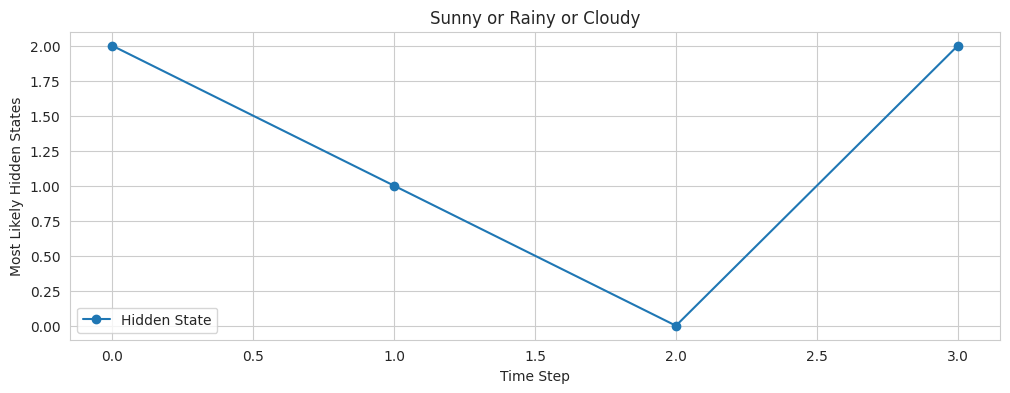

In [ ]:
print("Log Probability:", logprob)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 4))
plt.plot(hidden_states, '-o', label='Hidden State')
plt.xlabel("Time Step")
plt.ylabel("Most Likely Hidden States")
plt.title("Sunny or Rainy or Cloudy")
plt.legend()
plt.show()